In [1]:
#Import packages
import pandas as pd
%matplotlib inline

In [2]:
#Read the csv file, setting 'site_no' to string and 'datetime' as date time object 
df = pd.read_csv('./data/GageData.csv', 
                 dtype={'site_no':'str'},
                 parse_dates=['datetime']) 

In [3]:
df.head()

,agency_cd,site_no,datetime,MeanFlow_cfs,Confidence
0,USGS,02087500,1930-10-01,347.0,A
1,USGS,02087500,1930-10-02,173.0,A
2,USGS,02087500,1930-10-03,132.0,A
3,USGS,02087500,1930-10-04,125.0,A
4,USGS,02087500,1930-10-05,125.0,A


Create new "month" and "year" columns in our dataframe

In [4]:
#Extract new month and year columns from the "datetime" column
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

Calculate "water year" - following year if in Oct, Nov, Dec

In [ ]:
#Default water year is the current year
df['water_year'] = df['year']
#Update records in Oct, Nov, and Dec to year + 1
df.loc[df['month']>=10,'water_year'] = df['year'] + 1

In [8]:
#Examine the data
df.sample(10)

,agency_cd,site_no,datetime,MeanFlow_cfs,Confidence,month,year
30288,USGS,02087500,2013-09-03,1410.0,A,9,2013
9768,USGS,02087500,1957-06-29,397.0,A,6,1957
3260,USGS,02087500,1939-09-04,1880.0,A,9,1939
25700,USGS,02087500,2001-02-10,353.0,A,2,2001
29779,USGS,02087500,2012-04-12,500.0,A,4,2012
14844,USGS,02087500,1971-05-23,550.0,A,5,1971
977,USGS,02087500,1933-06-04,365.0,A,6,1933
5819,USGS,02087500,1946-09-06,231.0,A,9,1946
22272,USGS,02087500,1991-09-23,283.0,A,9,1991
26851,USGS,02087500,2004-04-06,622.0,A,4,2004


Compute a new column indicating records before Falls Lake dam construction (before 1980) and after completion of Falls Lake dam (1984 and onwards). 

In [9]:
#Step 1: Create masks base on year
beforeMask = df['year'] < 1980
afterMask = df['year'] >= 1984

In [10]:
#Step 2: Use the masks as "loc" row index filters, setting the [new] status column values
df.loc[beforeMask,'Status'] = "Before dam"
df.loc[afterMask,'Status'] = "After dam"

In [12]:
#Examine the data
df.sample(10)

,agency_cd,site_no,datetime,MeanFlow_cfs,Confidence,month,year,Status
27640,USGS,02087500,2006-06-04,520.0,A,6,2006,After dam
495,USGS,02087500,1932-02-08,1460.0,A,2,1932,Before dam
4196,USGS,02087500,1942-03-28,642.0,A,3,1942,Before dam
24486,USGS,02087500,1997-10-15,499.0,A,10,1997,After dam
28886,USGS,02087500,2009-11-01,266.0,A,11,2009,After dam
16680,USGS,02087500,1976-06-01,365.0,A,6,1976,Before dam
2711,USGS,02087500,1938-03-04,714.0,A,3,1938,Before dam
19700,USGS,02087500,1984-09-07,518.0,A,9,1984,After dam
24277,USGS,02087500,1997-03-20,2760.0,A,3,1997,After dam
453,USGS,02087500,1931-12-28,480.0,A,12,1931,Before dam


In [13]:
df['Status'].unique()

array(['Before dam', nan, 'After dam'], dtype=object)

### Plotting

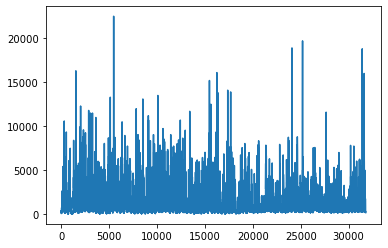

In [14]:
#Create a basic plot of the MeanFlow_csf column
df['MeanFlow_cfs'].plot();

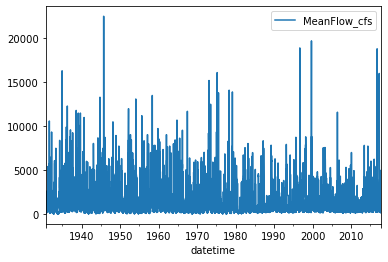

In [16]:
#Explicitl ySet which columns are used to set the X and Y axes
df.plot(x='datetime',y='MeanFlow_cfs');

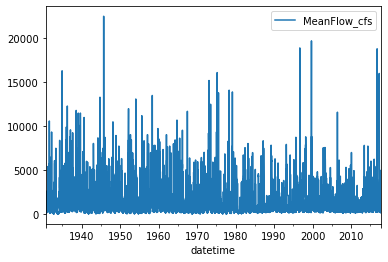

In [17]:
#Alternatively, set the datetime column to be the dataframe's index
df2 = df.set_index('datetime')
df2.plot(y='MeanFlow_cfs');

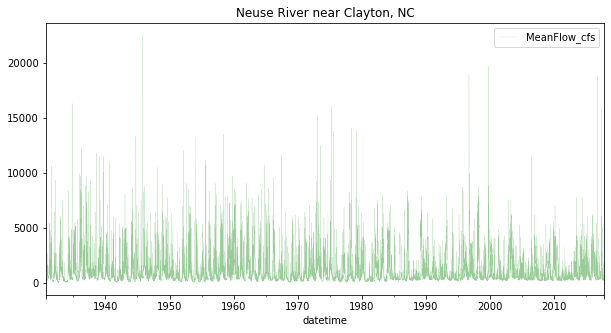

In [18]:
#Repeat above, but add some "aesthetics"
df.plot(
    x='datetime',
    y='MeanFlow_cfs',
    kind='line',
    figsize=(10,5),#figure size
    lw=0.2,        #line weigth
    alpha=0.4,     #opacticty
    color='green', #color
    title='Neuse River near Clayton, NC',
);

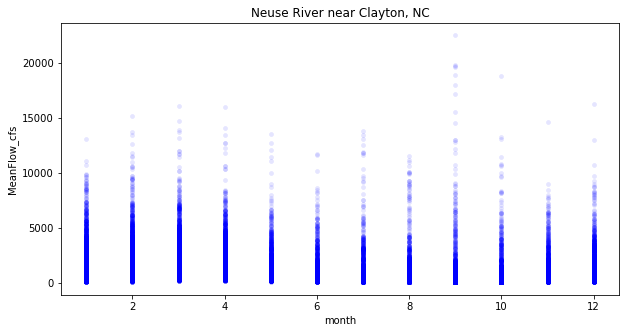

In [19]:
#Changing the aesthetics alters the message...
df.plot(
    x='month',
    y='MeanFlow_cfs',
    kind='scatter', #Changed from line to point
    figsize=(10,5),
    lw=0.2,        
    alpha=0.1,      #Decreased the opacity
    color='blue',   
    title='Neuse River near Clayton, NC'
);

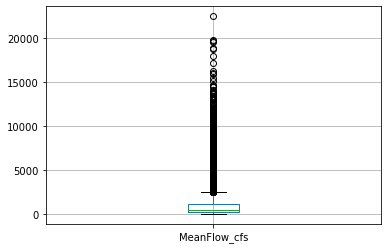

In [20]:
#Create a box and whiskers plot of our MeanFlow_cms values
df.boxplot(column='MeanFlow_cfs');

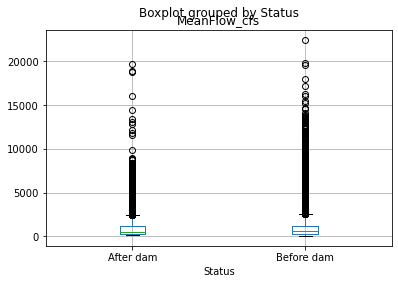

In [21]:
#Create a box and whiskers plot of our MeanFlow_cms values, broken by status
df.boxplot(column='MeanFlow_cfs',by='Status');

In [24]:
#Set aesthetics using matplotlib
import matplotlib.pyplot as plt

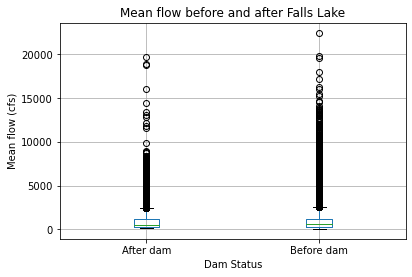

In [30]:
# we use our same pandas plot but use matplotlib to choose specific look
df.boxplot(column='MeanFlow_cfs',by='Status')
plt.ylabel("Mean flow (cfs)")
plt.xlabel("Dam Status")
plt.title("Mean flow before and after Falls Lake")
plt.suptitle("");

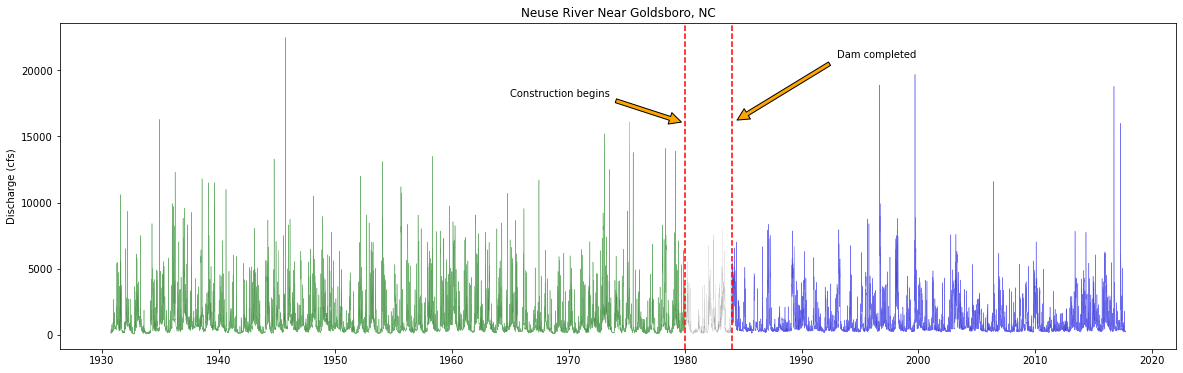

In [32]:
#Create the canvas
plt.figure(figsize=(20,6))

#Add plot lines for the entire dataframe, then the two dataframe subsets
plt.plot(df2['MeanFlow_cfs'],color='grey',linewidth=0.1) 
plt.plot(df2.loc[df2['year']<1980,'MeanFlow_cfs'],color='green',alpha=0.5,linewidth=0.5)
plt.plot(df2.loc[df2['year']>=1984,'MeanFlow_cfs'],color='blue',alpha=0.5,linewidth=0.5)

#Add the aesthetics
plt.title("Neuse River Near Goldsboro, NC")
plt.ylabel("Discharge (cfs)")

plt.axvline(x='1979-12-31',color='red',ls='--')
plt.annotate('Construction begins',
             xy=('1980',16000),
             xytext=('1965',18000),
             arrowprops=dict(facecolor='orange',shrink=0.05))


plt.axvline(x='1984-01-01',color='red',ls='--')
plt.annotate('Dam completed',
             xy=('1984-01-01',16000),
             xytext=('1993',21000),
             arrowprops=dict(facecolor='orange',shrink=0.05))


#Show the plot
plt.show;